# Exercise RL5.1: Policy improvement and policy iteration

In this exercise you extend the code from exercise RL4.1 to perform policy improvement and policy iteration.

(1) Generate the random policy, i.e. the policy which has in each state the probability 0.25 to select one of the four possible actions. Use your policy evaluation algorithm from exercise RL4.1 to compute the value function of the random policy.

(2) Implement a function that performs policy improvement using the value that was obtained by policy evaluation. See lecture slide for detals on how the improved policy is computed. Print the new policy and describe the changes over the initial policy. Is the improved policy stochastic or deterministic and why?

(3) Compute the value function of the new, improved policy. Do you see the improvement over the old policy? Is the new policy optimal?

(4) Modify the initial random policy in the following way: for state (2,3) the selected action is always LEFT. Repeat steps (2) and (3) for this modified policy. What is different compared to the random policy?

(5) Implement policy iteration and apply it to the modified intial policy from (4). Plot the results from each iteration. How many iteration are need to obtain the optimal policy?

In [1]:
from matplotlib import pylab as plt
import numpy as np

(1) Generate the random policy, i.e. the policy which has in each state the probability 0.25 to select one of the four possible actions. Use your policy evaluation algorithm from exercise RL4.1 to compute the value function of the random policy.

In [2]:
# define varibles encoding the actions:
# LEFT=0, DOWN=1, RIGHT=2, UP=3
# 
LEFT=0;
DOWN=1;
RIGHT=2;
UP=3;


# 
# Function implemeting the gridworld environment
# 
# Input:
# s: current state
# a: selected action
# 
# Output:
# snext: next state
# r: reward obtained
# goalstate: boolean variable indicating whether snext is the goal state or not
#
# Note that how the function is implemented it can only implement a deterministic environment as it
# returns a definite next state and reward. Probabilistic rewards and state changes are not possible.
#


def env_p(s,a):
    
    r=0
    snext=np.zeros(2).astype(int);
    goalstate=False
    
    # compute next state depeinding on selected action        
    if (a==LEFT):
        snext[0]=s[0]
        snext[1]=s[1]-1        
        
    elif (a==DOWN):
        snext[0]=s[0]+1
        snext[1]=s[1]
            
    elif (a==RIGHT):
        snext[0]=s[0]
        snext[1]=s[1]+1
            
    elif (a==UP):
        snext[0]=s[0]-1
        snext[1]=s[1]

        
    # check whether we hit the lower border of the grid world
    if snext[0]>1:
        snext[0]=1

    # check whether we hit the upper border of the grid world
    if snext[0]<0:
        snext[0]=0            
            
    # check whether we hit the left border of the grid world
    if snext[1]<0:
        snext[1]=0
        
    # check whether we hit the right border of the grid world
    if snext[1]>3:
        snext[1]=3

                        
    # cost of action 
    r=r-1 
            
    # check wether goal state was reached
    if (snext[0]==1) & (snext[1]==3):
        r=r+10 # obtain reward for reaching goal state
        goalstate=True
        
        
    # set reward and state if initial state was already the goal state
    if (s[0]==1) & (s[1]==3):    
        # agent was already in goal state, ignore action
        goalState=True
        r=0
        snext=s

                    
    return snext,r,goalstate

In [3]:
# array implementing random policy        
random_policy=np.zeros([2,4,4])

random_policy[0, :, :]=0.25
random_policy[1, :3, :]=0.25

In [4]:
def display_grid(grid):
    fig, ax = plt.subplots()
    ax.matshow(grid, cmap='ocean')

    for i in range(grid.shape[1]):
        for j in range(grid.shape[0]):
            c = grid[j, i]
            ax.text(i, j, str(np.round(c, 3)), va='center', ha='center')

In [5]:
def policy_evaluation(value, policy, N):
    actions = 4
    for n in range(N):
        value_previous = value
        for i in range(value.shape[0]):
            for j in range(value.shape[1]):
                s = np.array([i,j])
                current_value = 0 
                for a in range(actions):
                    snext,r,goalstate = env_p(s,a)
                    current_value += policy[s[0],s[1],a] * (r + value_previous[snext[0], snext[1]])
                value[s[0],s[1]] = current_value
        display_grid(value)
        plt.title('n = {}'.format(n+1))
    return value

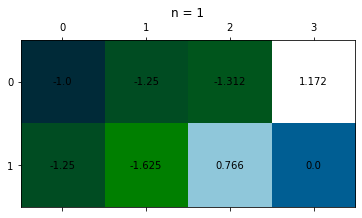

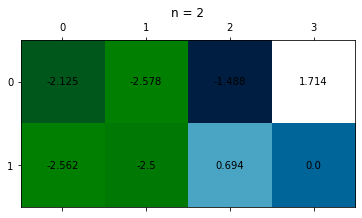

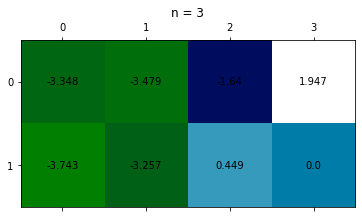

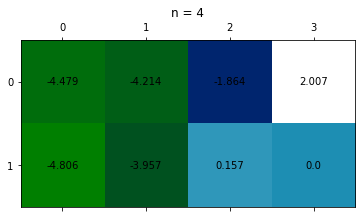

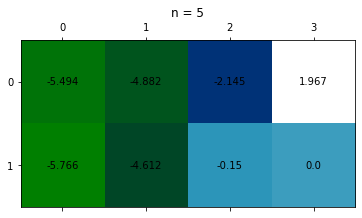

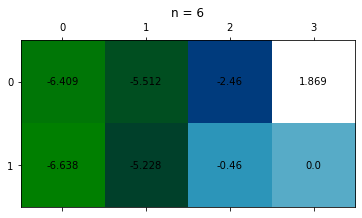

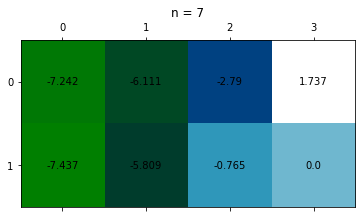

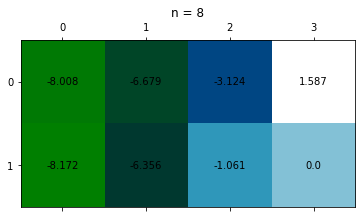

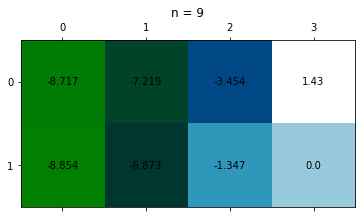

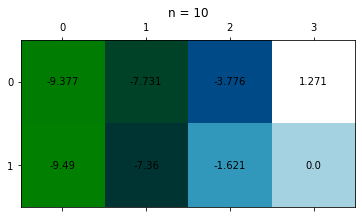

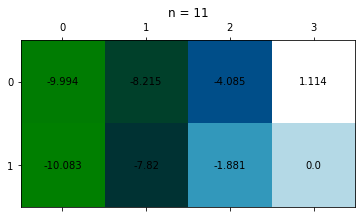

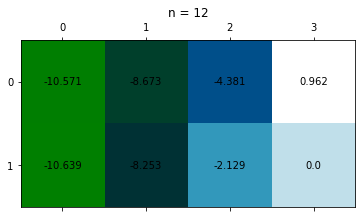

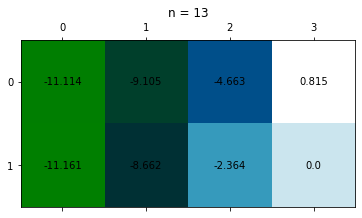

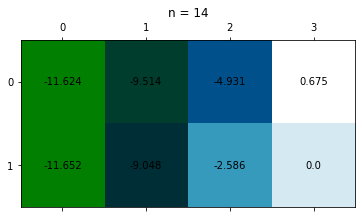

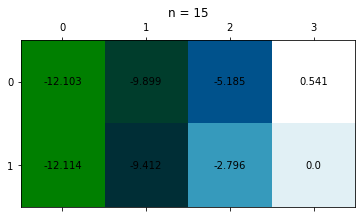

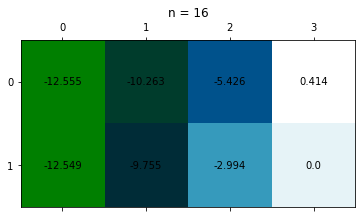

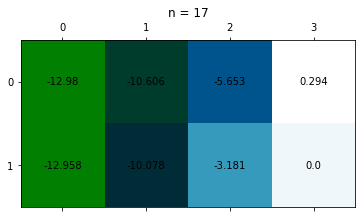

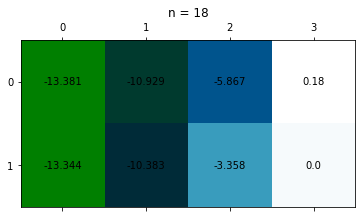

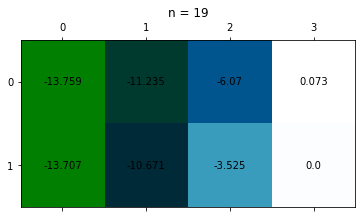

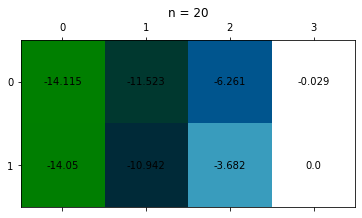

In [6]:
value = np.zeros((2,4))
N = 20

value_random = policy_evaluation(value, random_policy, N)

In [7]:
print(value_random)

[[-14.11497174 -11.52264098  -6.26121422  -0.02904531]
 [-14.05015571 -10.94208118  -3.68200004   0.        ]]


(2) Implement a function that performs policy improvement using the value that was obtained by policy evaluation. See lecture slide for detals on how the improved policy is computed. Print the new policy and describe the changes over the initial policy. Is the improved policy stochastic or deterministic and why?

In [8]:
def policy_improvement(value):
    new_policy=np.zeros([2,4,4])
    actions=4
    for i in range(value.shape[0]):
        for j in range(value.shape[1]):
            s = np.array([i,j])
            values_actions=np.zeros(4)
            if (s[0]==1) & (s[1]==3):
                continue
            else:
                for a in range(actions):
                    snext,r,goalstate = env_p(s,a)
                    values_actions[a] = r + value[snext[0], snext[1]]
                idx_max = np.argmax(values_actions)
                idx_all = np.where(values_actions==values_actions[idx_max])[0]
                p=1/len(idx_all)
                new_policy[s[0], s[1], :] = 0
                new_policy[s[0], s[1], idx_all] = p
    return new_policy

In [9]:
new_policy = policy_improvement(value_random)
print(new_policy)

[[[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 0.]]]


The new policy is deterministic.

(3) Compute the value function of the new, improved policy. Do you see the improvement over the old policy? Is the new policy optimal?

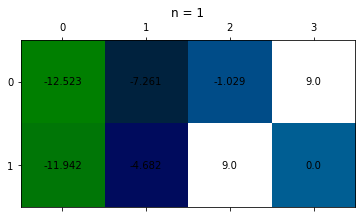

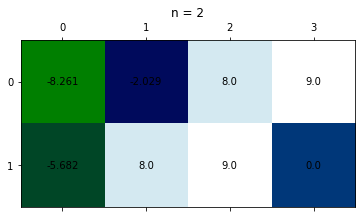

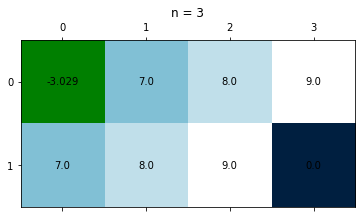

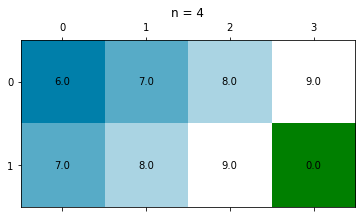

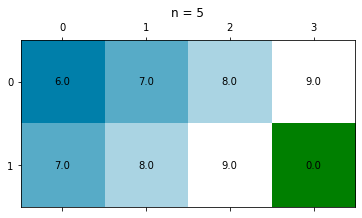

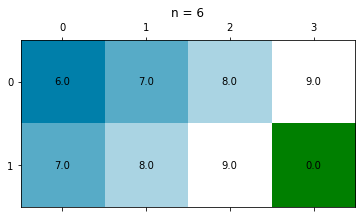

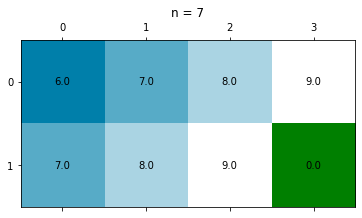

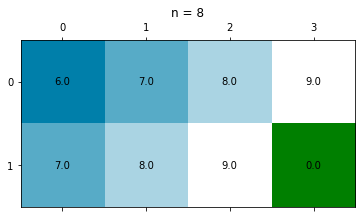

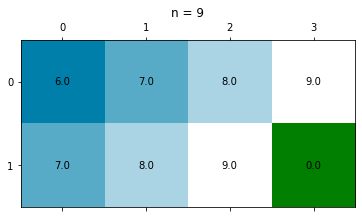

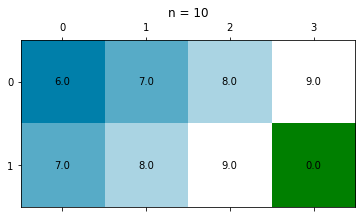

In [10]:
N = 10

value_new = policy_evaluation(value_random, new_policy, N)

In [11]:
print(value_new)

[[6. 7. 8. 9.]
 [7. 8. 9. 0.]]


The policy is the optimal policy.

(4) Modify the initial random policy in the following way: for state (2,3) the selected action is always LEFT. Repeat steps (2) and (3) for this modified policy. What is different compared to the random policy?

In [12]:
# array implementing left policy        
left_policy=np.zeros([2,4,4])

left_policy[0, :, :]=0.25
left_policy[1, :3, :]=0.25

left_policy[0, 2, :]=0
left_policy[0, 2, LEFT]=1

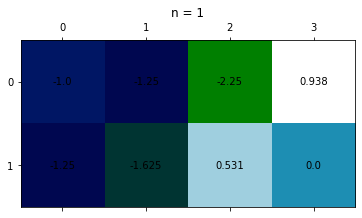

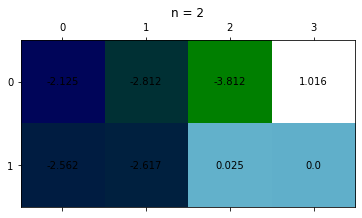

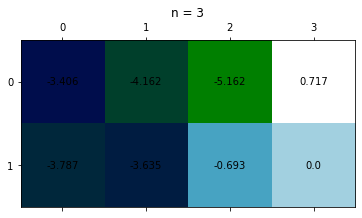

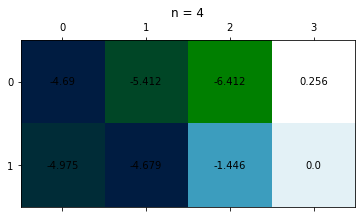

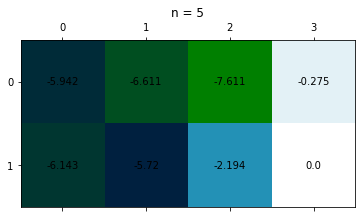

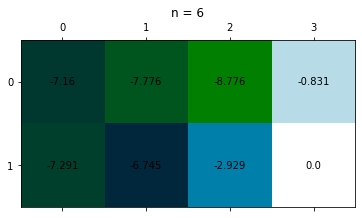

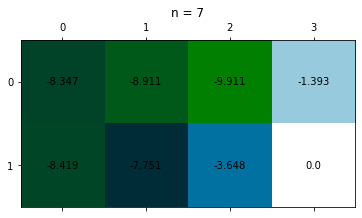

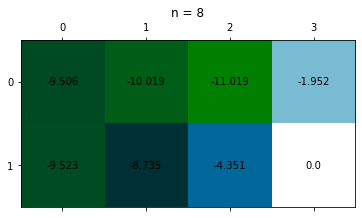

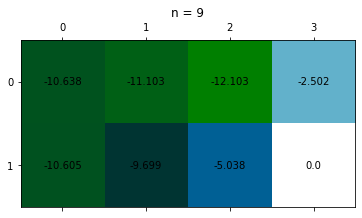

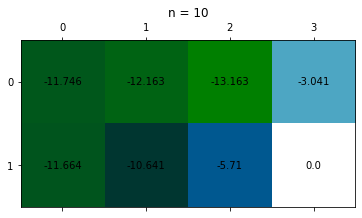

In [13]:
value = np.zeros((2,4))
N = 10

value_left = policy_evaluation(value, left_policy, N)

In [14]:
new_left_policy = policy_improvement(value_left)
print(new_left_policy)
print(new_left_policy[0, 0])
print(new_left_policy[0, 1])

[[[0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 0.]]]
[0. 1. 0. 0.]
[0. 1. 0. 0.]


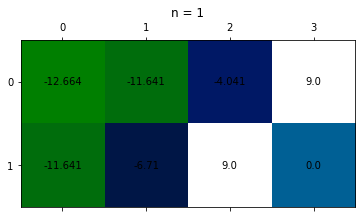

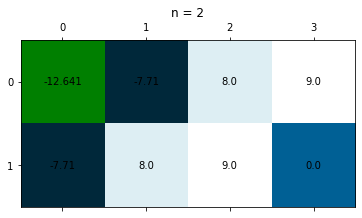

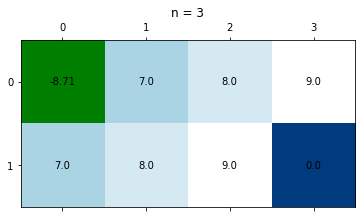

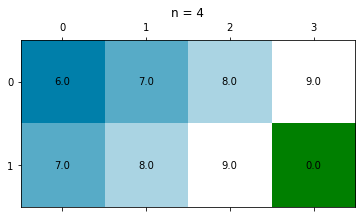

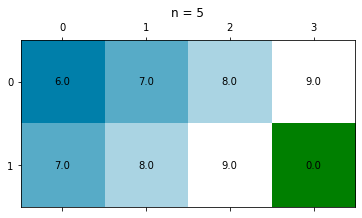

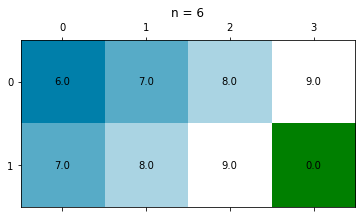

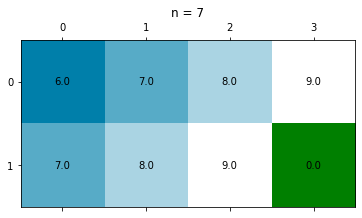

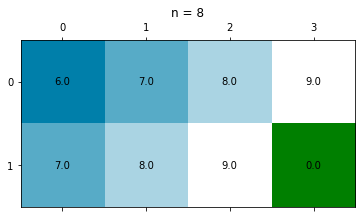

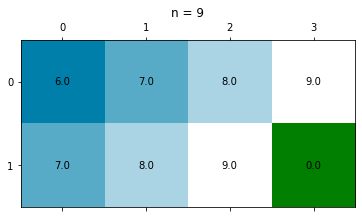

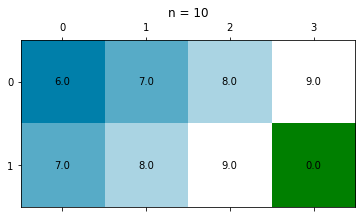

In [15]:
N = 10

value_left_new = policy_evaluation(value_left, new_left_policy, N)

The policy is different in that for states (0,0) and (0,1) the best action is now chosen to going down instead of going right. Probably, this is because the action in state (1, 2) (state (2,3)) then is optimal.

(5) Implement policy iteration and apply it to the modified intial policy from (4). Plot the results from each iteration. How many iteration are need to obtain the optimal policy?

In [16]:
def policy_iteration(policy, value_init, value_optimal, N_evaluation):
    value=value_init
    iteration=0
    while np.allclose(value, value_optimal)!=True:
        value = policy_evaluation(value, policy, N_evaluation)
        policy = policy_improvement(value)
        iteration += 1
    return policy,value, iteration

In [17]:
value_optimal=np.array([[6, 7, 8, 9],
                       [7, 8, 9, 0]])

values=np.zeros((2, 4))

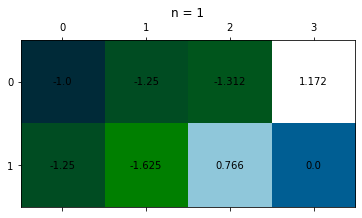

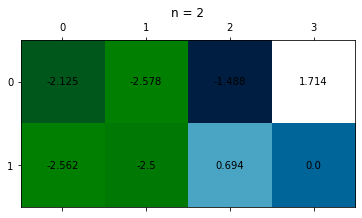

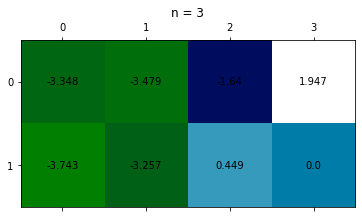

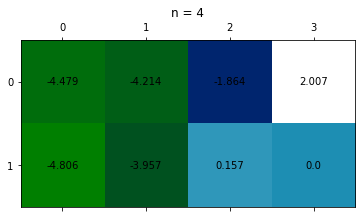

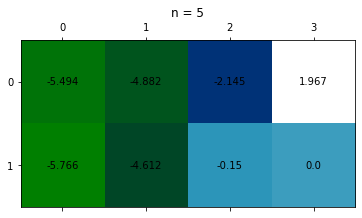

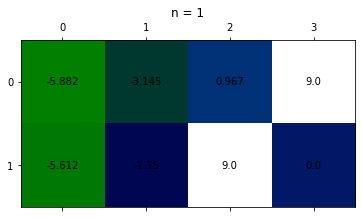

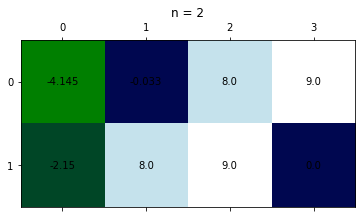

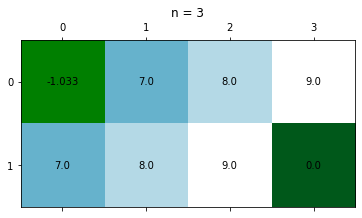

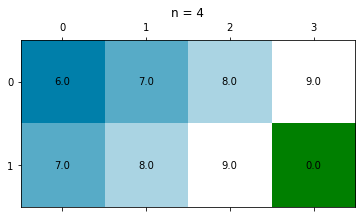

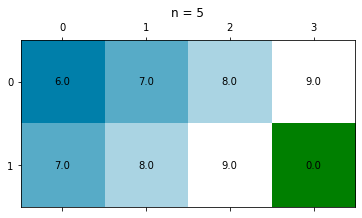

In [18]:
policy,value,iteration = policy_iteration(random_policy, values, value_optimal, 5,)

In [19]:
print(policy)
print(value)
print(iteration)

[[[0.  0.5 0.5 0. ]
  [0.  0.5 0.5 0. ]
  [0.  0.5 0.5 0. ]
  [0.  1.  0.  0. ]]

 [[0.  0.  1.  0. ]
  [0.  0.  1.  0. ]
  [0.  0.  1.  0. ]
  [0.  0.  0.  0. ]]]
[[6. 7. 8. 9.]
 [7. 8. 9. 0.]]
2
